Segment 1: Frequentist Statistics

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
np.random.seed(42)

Measures of Central Tendency - provide a summary statistics on the center of a given distributions. AKA the "average" values of a distribution.

In [17]:
x = st.skewnorm.rvs(10, size=1000)


In [18]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

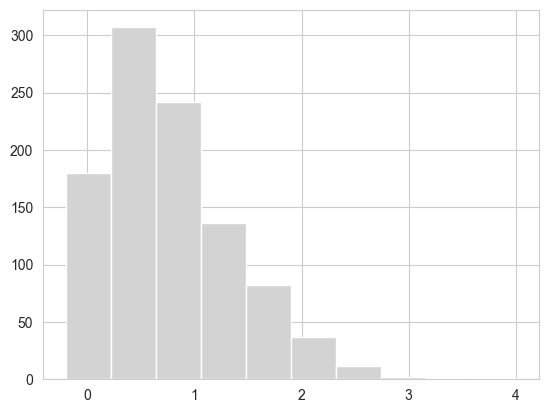

In [19]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

Mean - is the average and the most common measure of central tendency

In [20]:
xbar = x.mean()
xbar

0.7719211854654121

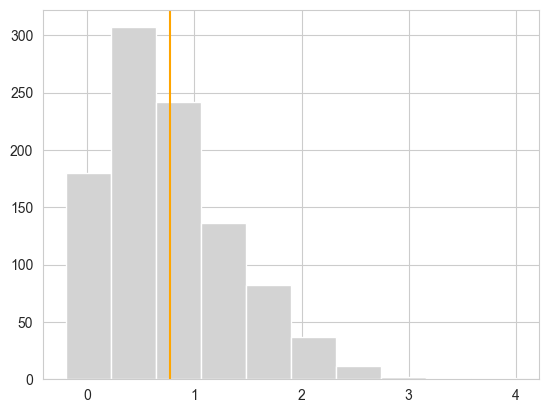

In [21]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

Median - the midpoint value in the distribution

In [22]:
np.median(x)

0.651420257427958

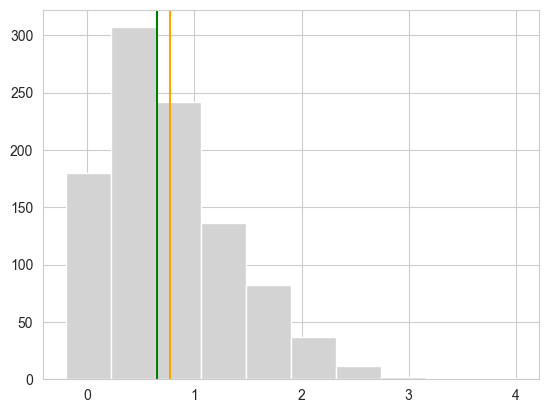

In [23]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

In [24]:
x.var() ** (1/2)

0.5960572059628305

In [25]:
sigma = x.std()
sigma

0.5960572059628305

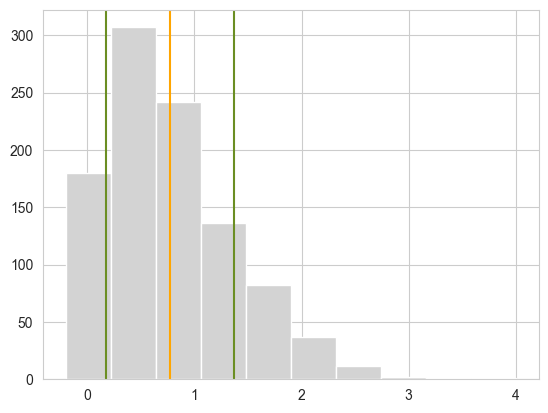

In [26]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

Standard Error

In [27]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [28]:
st.sem(x)

0.018858415432183823

In [29]:
st.sem(x, ddof=0)

0.018848983865986414

Gaussian Distribution - is also the normal distribution

In [30]:
x = np.random.normal(size=10000)

In [31]:
sns.set_style('ticks')

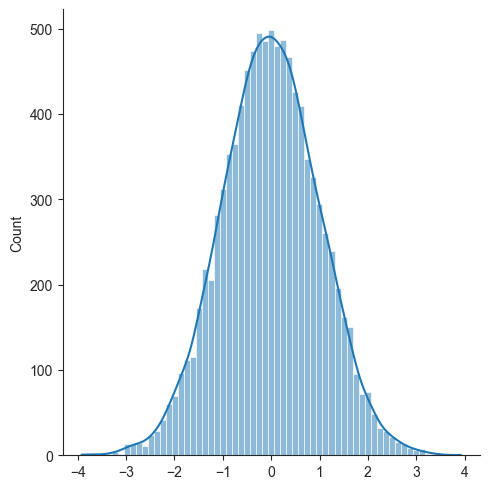

In [32]:
_ = sns.displot(x, kde=True)

In [33]:
x.mean()

-0.01626305454909193

In [34]:
x.std()

1.0039756140435032

The Central Limit Theorem

In [35]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

In [36]:
x_sample.mean()

-0.35958129882198664

In [37]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

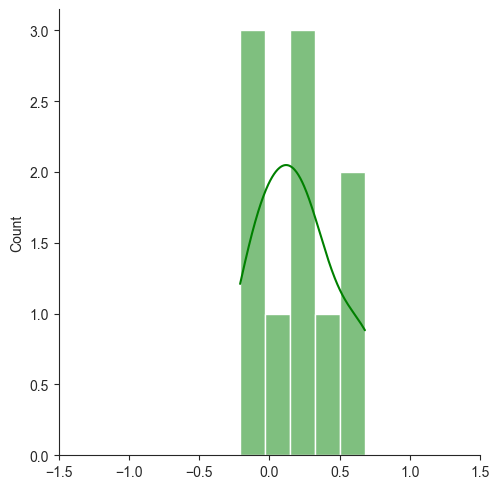

In [38]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

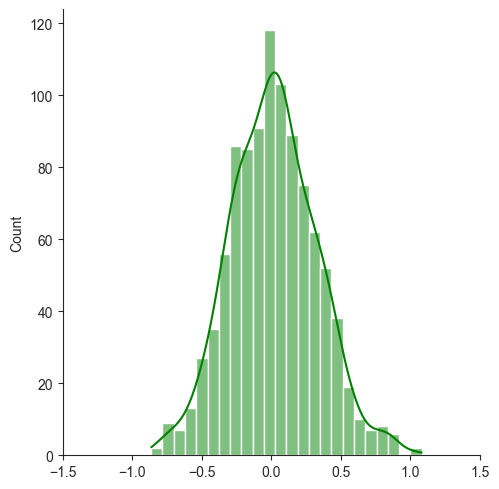

In [39]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

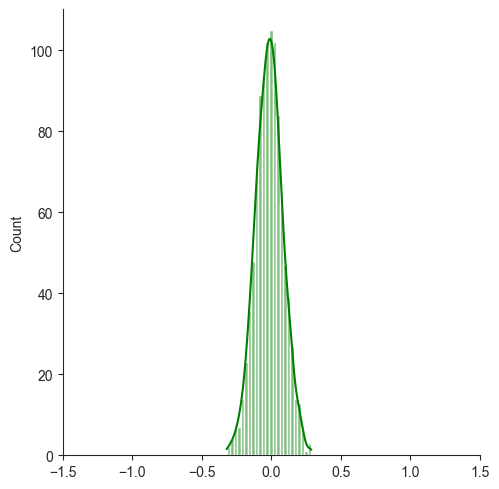

In [40]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Z-Scores - indicates how many standard deviations awawy from the mean a data point is.

In [41]:
x_i = 85
mu = 60
sigma = 10

In [42]:
x = np.random.normal(mu, sigma, 10000)

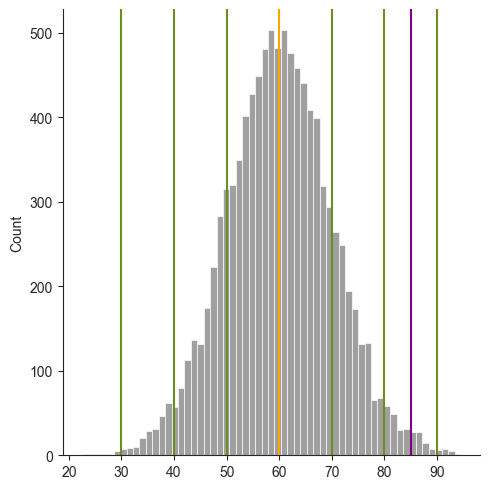

In [43]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [44]:
z = (x_i - mu) / sigma
z

2.5

In [45]:
st.norm.ppf(0.25)

-0.6744897501960817

The single sample t-test is a variation on the theme.

In [46]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [47]:
p_from_z(0)

1.0

In [48]:
x = [48, 50, 54, 60]

In [49]:
xbar = np.mean(x)
xbar

53.0

In [50]:
sx = st.sem(x)
sx

2.6457513110645907

In [51]:
t = (xbar-50)/sx
t

1.1338934190276817

T-Test is used to test whether the difference between the response of 2 groups is statistically significant or not.

P-Value - is a measures the probability of obtaining the observed results, assuming that the null hypothesis is true.

In [52]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [53]:
p_from_t(t, len(x))

0.33925405085645427

In [54]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.33925405085645427, df=3)

In [55]:
penguins = sns.load_dataset('penguins').dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [56]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [57]:
adelie = penguins[penguins.species == 'Adelie']
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [58]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [59]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

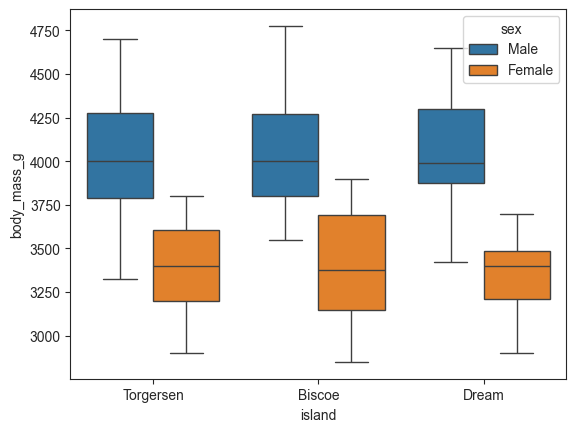

In [60]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

In [61]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy() / 1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [62]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy() / 1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [63]:
fbar = f.mean()
fbar

3.368835616438356

In [64]:
mbar = m.mean()
mbar

4.043493150684932

Welch T-Test - to quantify whether 2 

In [65]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [66]:
nf = f.size
nm = m.size

In [67]:
t = (fbar - mbar) / (sf / nf + sm / nm) ** (1 / 2)
t

-13.126285923485879

In [68]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny) ** 2 / (sx ** 2 / (nx ** 2 * (nx - 1)) + sy ** 2 / (ny ** 2 * (ny - 1)))

In [69]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [70]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

6.402319748031473e-26

In [71]:
-np.log10(p)

25.193662639886046

In [72]:
st.ttest_ind(f, m, equal_var=False)

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031473e-26, df=135.69357893530386)

Paired T-test is when you have 2 vectors where each element in vector x has a corresponding element in vector y.

In [73]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [74]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

In [75]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

In [76]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')] 
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


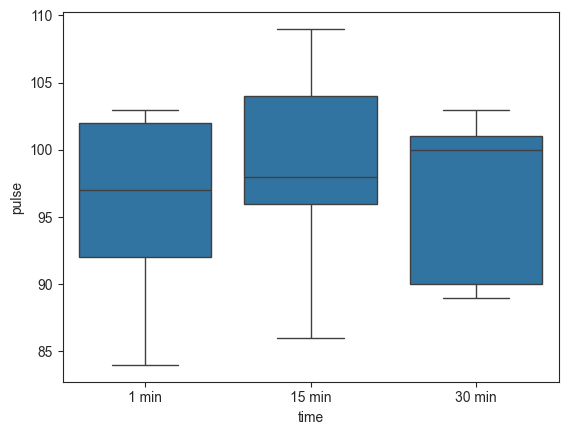

In [77]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [78]:
min1 = walk_no[walk_no.time == '1 min' ]['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [79]:
min1.mean()

95.6

In [80]:
min15 = walk_no[walk_no.time == '15 min' ]['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [81]:
min15.mean()

98.6

In [82]:
min30 = walk_no[walk_no.time == '30 min' ]['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [83]:
min30.mean()

96.6

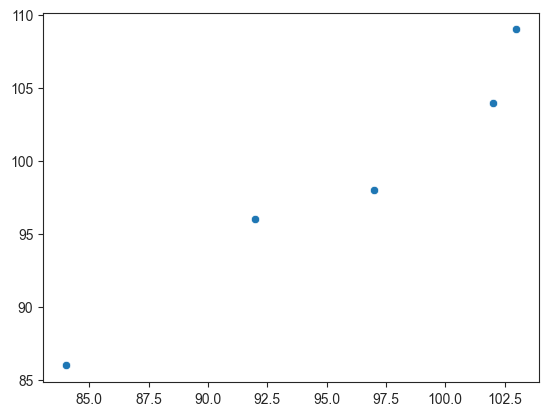

In [84]:
_ = sns.scatterplot(x= min1, y = min15)

In [85]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [86]:
dbar = d.mean()
dbar

3.0

In [87]:
sd = st.sem(d)

In [88]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])


In [89]:
xbar = x.mean()
s = x.std()
n = x.size

In [90]:
z = 1.96

In [91]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z * (my_s / my_n ** (1 / 2))

In [92]:
CIerr = CIerr_calc(z, s, n)
CIerr

3.4637403013216796

In [93]:
xbar + CIerr

58.08874030132168

In [94]:
xbar - CIerr

51.16125969867832

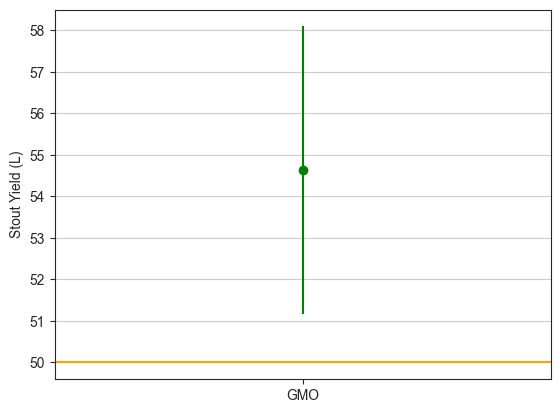

In [95]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

In [96]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

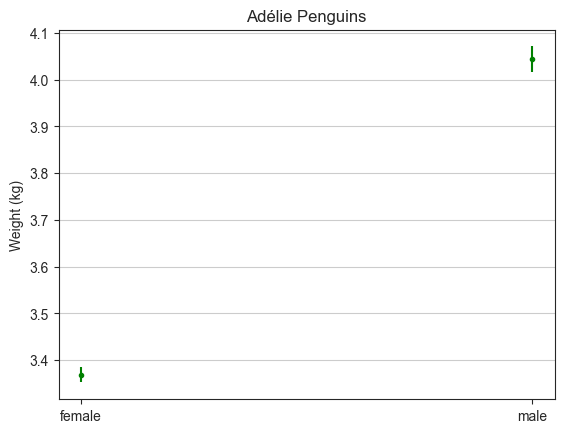

In [86]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr], fmt='.', color='green')

In [97]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [98]:
means = [t.mean(), b.mean(), d.mean()]

In [99]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1)

In [100]:
nt, nb, nd = t.size, b.size, d.size

In [101]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

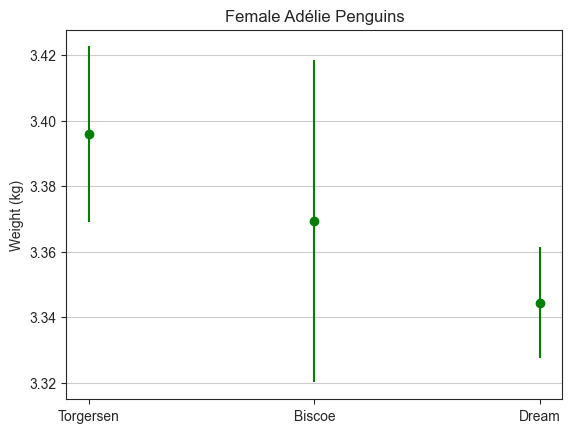

In [102]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs, fmt='o', color='green')

__Analysis of Variance (ANOVA)__ - allows you to compare more than 2 samples in a single statistical test. It makes these assumptions:
1. Independent Samples
2. Normally-distributed populations
3. _Homoscedasticity_ - population standard deviations are equal.

In [103]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

# Pearson Correlation Coefficient
__Covariance__ provides a measure of how related the variables aer to each other.

__Correlation__ builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

In [104]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
x = iris.sepal_length
y = iris.petal_length

In [106]:
sns.set_style('darkgrid')


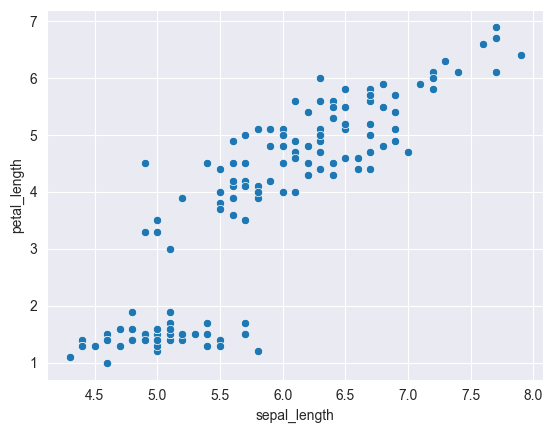

In [107]:
_ = sns.scatterplot(x=x, y=y)

In [108]:
n = iris.sepal_width.size
n

150

In [109]:
xbar, ybar = x.mean(), y.mean()

In [110]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [111]:
cov = sum(product)/n
cov

1.2658200000000006

In [112]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

In [113]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

In [114]:
p = p_from_t(t, n-1) 
p

1.0386674194495906e-47

In [117]:
-np.log10(p)

46.98352349096045

In [118]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8717537758865833, pvalue=1.0386674194496243e-47)

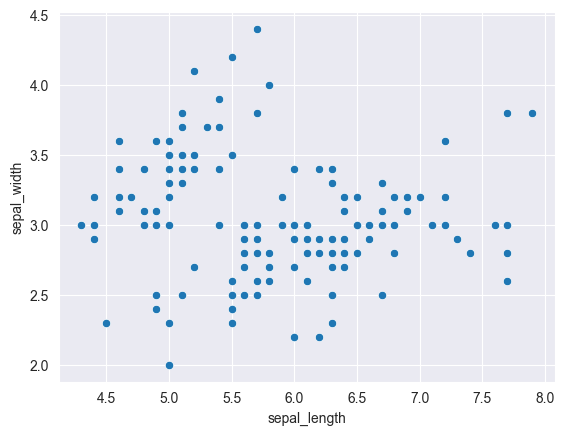

In [119]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [120]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

# The Coefficient of Determination

Also known as r^2, this is the proporation of variance in 1 variable, explained by another. It can range from 0 to 1 and it is simply the square of the Pearson r.

In [121]:
rsq = r**2
rsq

0.7599546457725157

In [122]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080679

# Correlation vs Causation
Correlation doesn't imply causation on its own. 3 criteria are required for inferring causal relationships:
1. __Covariation__: 2 variables vary together
2. __Temporal Precedence__: The affected variable must vary after the vausal variable is varied.
3. __Elimination of Extraneous Variables__: We must be sure no 3rd variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable. E.g., with (ideally double-blind) randomized control trials.

# Segment 2: Regression
### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

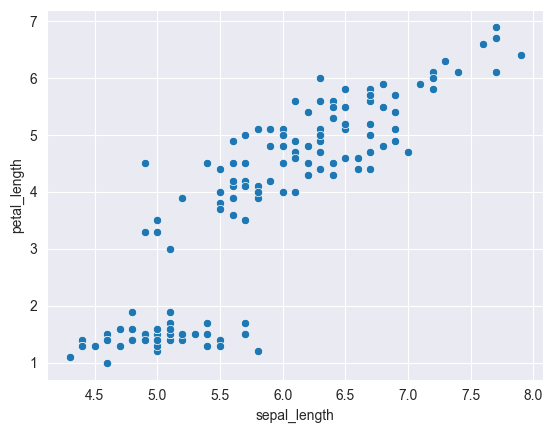

In [123]:
_ = sns.scatterplot(x=x, y=y)

__Cartesian Plane__ - is a 2-D surface, with y-axis perpendicular to horizontal x-axis.

In [124]:
beta1 = cov / np.var(x)
beta1

1.8584329782548417

In [125]:
beta0 = ybar - beta1 * xbar

In [126]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

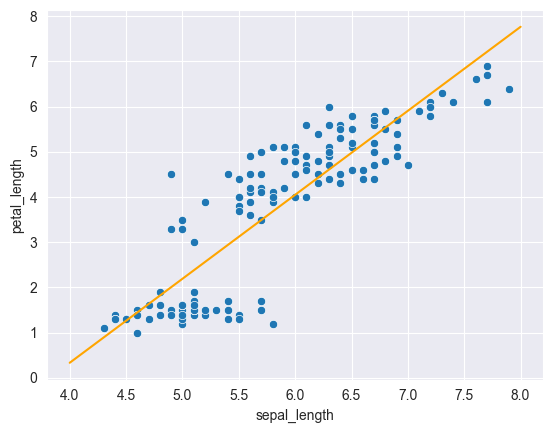

In [127]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

In [128]:
x_i = 5.5

In [129]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991708

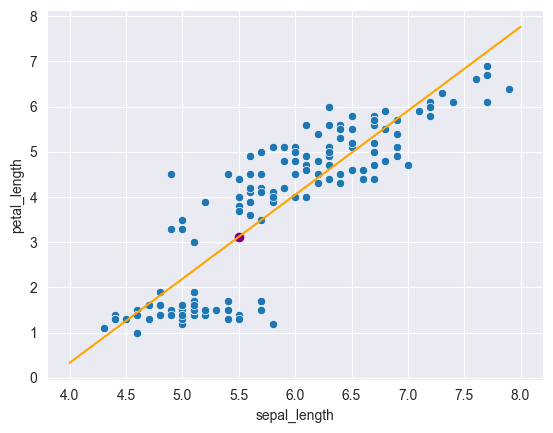

In [130]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

In [131]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

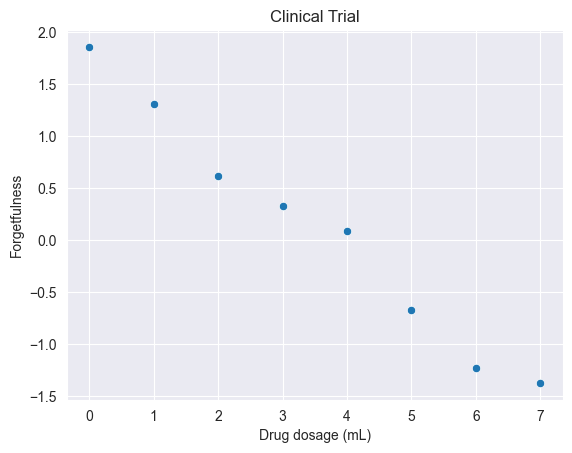

In [132]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [133]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [134]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

In [123]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

In [124]:
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1*xline

In [125]:
x_i = 4.5

In [126]:
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

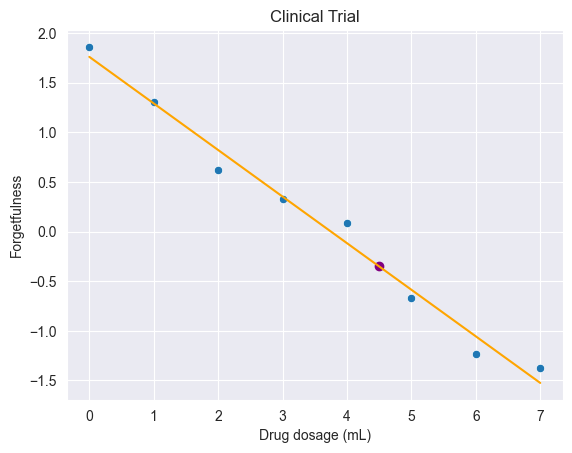

In [127]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

__Exercise__: With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [135]:
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [136]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()

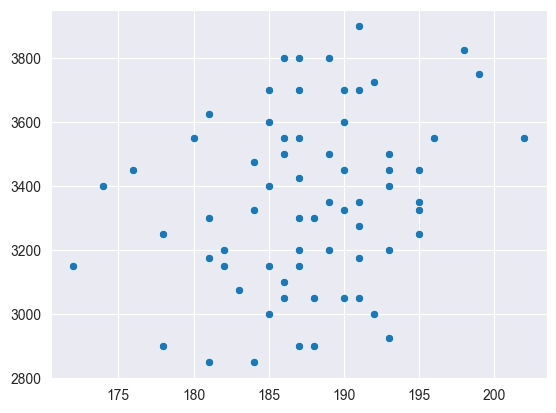

In [137]:
_ = sns.scatterplot(x=x, y=y)

In [132]:
cov_mat = np.cov(x, y)
cov_mat

array([[3.13044140e+01, 3.96285198e+02],
       [3.96285198e+02, 7.25656393e+04]])

In [133]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

12.659083726357764

In [134]:
beta0 = y.mean() - beta1*x.mean()
beta0

991.5290574707042

In [152]:
x_i = 197

In [153]:
y_i = beta0 + beta1 * x_i
y_i

3485.3685515631837

In [154]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline

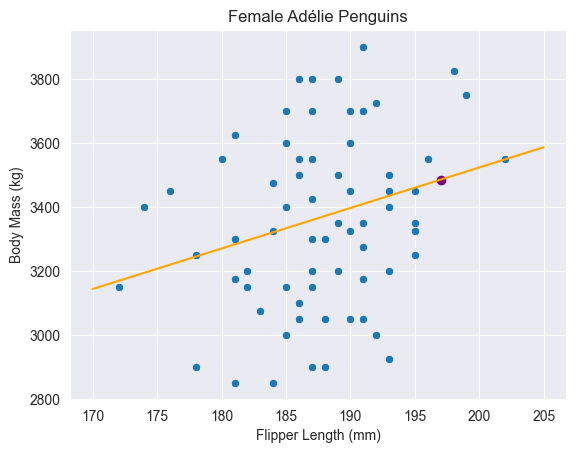

In [155]:
sns.scatterplot(x=x, y=y)
plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

__Ordinary Least Squares (OLS)__ is a linear least squares method we can use to estimate the parameters of regression models that have more than 1 predictor variable. 

In [3]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

In [4]:
sns.set_style('whitegrid')

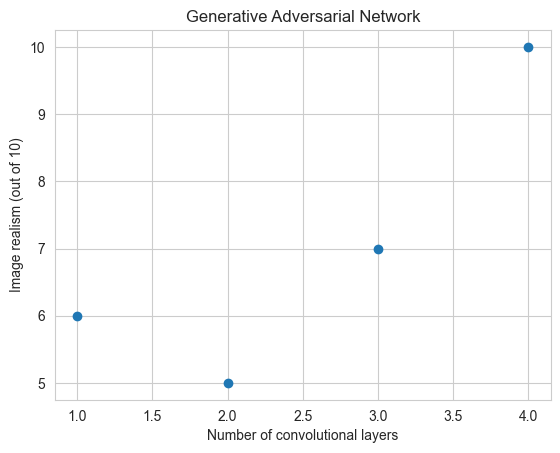

In [5]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

In [6]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [7]:
z = np.array([56, 154])

In [8]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [9]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

In [10]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

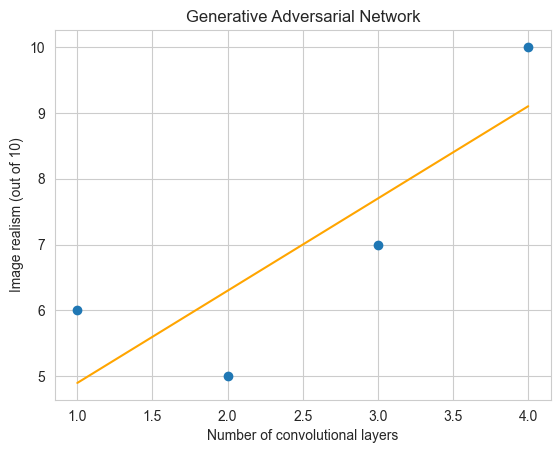

In [11]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

In [12]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [13]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

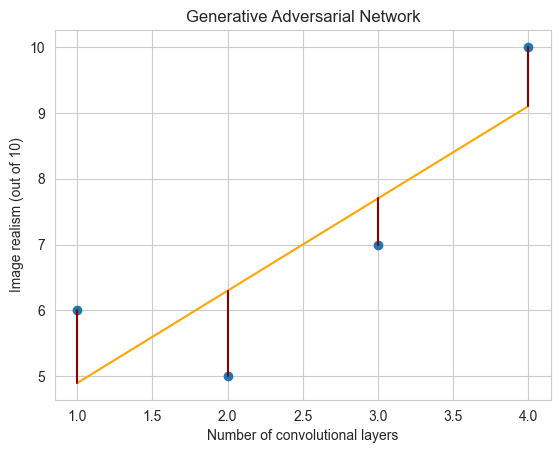

In [14]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

In [138]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [139]:
sns.set_style('darkgrid')

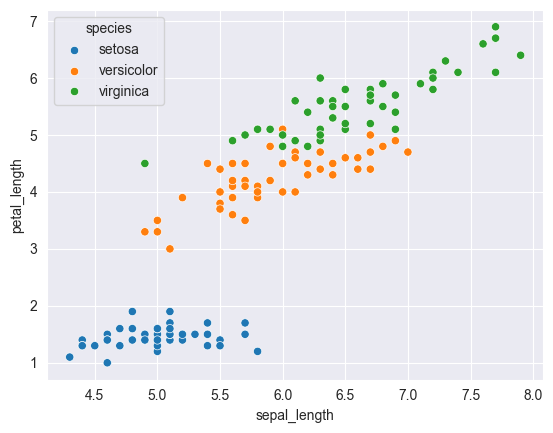

In [140]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [141]:
import pandas as pd

In [142]:
dummy = pd.get_dummies(iris.species)
dummy

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [143]:
y = iris.petal_length

In [144]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X 

,sepal_length,setosa,versicolor
0,5.1,True,False
1,4.9,True,False
2,4.7,True,False
3,4.6,True,False
4,5.0,True,False
...,...,...,...
145,6.7,False,False
146,6.3,False,False
147,6.5,False,False
148,6.2,False,False


In [146]:
import statsmodels.api as sm

In [147]:
X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,True,False
1,1.0,4.9,True,False
2,1.0,4.7,True,False
3,1.0,4.6,True,False
4,1.0,5.0,True,False
...,...,...,...,...
145,1.0,6.7,False,False
146,1.0,6.3,False,False
147,1.0,6.5,False,False
148,1.0,6.2,False,False


In [150]:
model = sm.OLS(y, X.astype(float))
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          1.46e-116
Time:                        12:08:39   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
beta = result.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

In [152]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

/var/folders/sb/rk8hb5_x33z0cd65bq64x49w0000gn/T/ipykernel_1233/2895031748.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vi_yline = beta[0] + beta[1]*xline
/var/folders/sb/rk8hb5_x33z0cd65bq64x49w0000gn/T/ipykernel_1233/2895031748.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_yline = beta[0] + beta[1]*xline + beta[2]
/var/folders/sb/rk8hb5_x33z0cd65bq64x49w0000gn/T/ipykernel_1233/2895031748.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

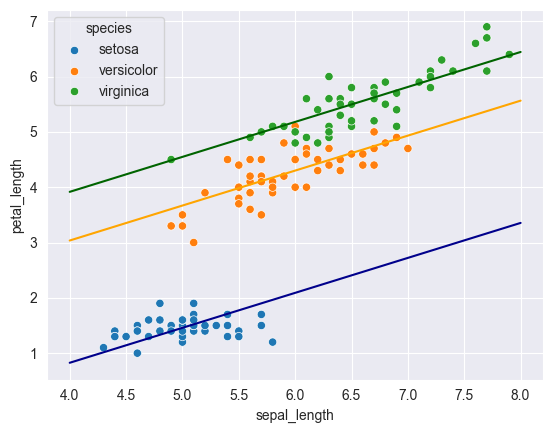

In [153]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

In [154]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [155]:
y_i = beta[0] + beta[1]*x_sepall_i + beta[2]*x_setosa_i + beta[3]*x_versic_i

/var/folders/sb/rk8hb5_x33z0cd65bq64x49w0000gn/T/ipykernel_1233/1873123482.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_i = beta[0] + beta[1]*x_sepall_i + beta[2]*x_setosa_i + beta[3]*x_versic_i


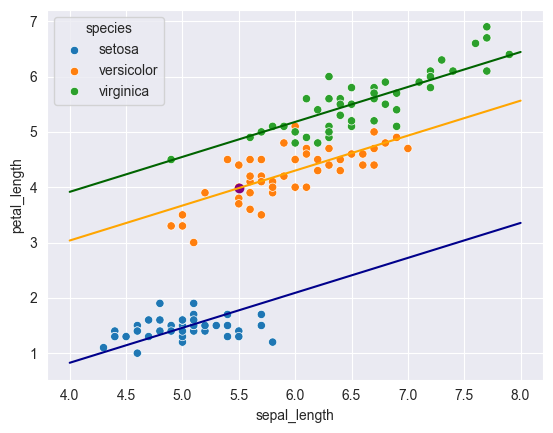

In [156]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

In [157]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0

In [158]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])

In [159]:
y_i = np.dot(beta, x_i)


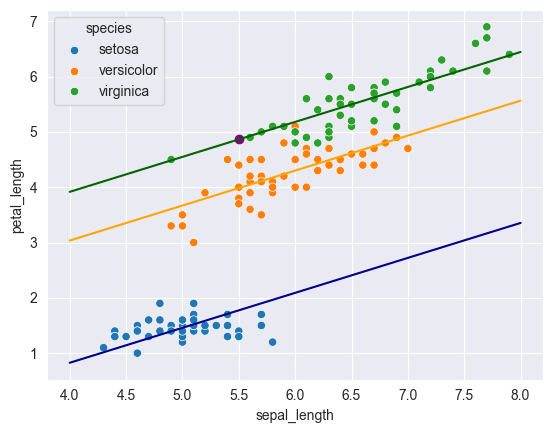

In [160]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='purple')

__Logistic Regression__ - resonably often we'd like to have a regression model that predicts a binary outcome using a logarithm function.

In [162]:
def logit(my_p): # this is also available as scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [163]:
logit(0.5)

0.0

In [165]:
logit(0.99)

4.595119850134589

In [166]:
logit(0.01)

-4.59511985013459

In [164]:
def expit(my_x): # this is also available as scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [167]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [168]:
np.unique(titanic['survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [169]:
np.unique(titanic['sex'], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [170]:
np.unique(titanic['class'], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

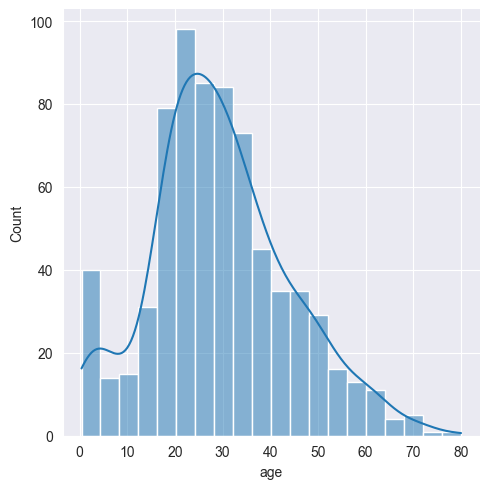

In [171]:
_ = sns.displot(titanic['age'], kde=True)